<a href="https://colab.research.google.com/github/GMaina716/WEEK-3-IP/blob/main/Moringa_Data_Science_Prep_W3_Independent_Project_2021_05_George_Maina_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# we start by uploading the necssary packages that we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Understanding and Data Prepapration**

On this section, we will upload the data sets,
then combine the datasets with daily records into one dataset called telcom.
We will look for any anormalies in the data such us missing value and outliers
Missing values will be filled or dropped depending on the extent of their numbers
COlumns with values that will not be needed in the analysis will be dropped.
We will analyse the two datasets separately by looking at the statistical attributes of the data.
We will also look at the shape, size and dimensions of the individual datasets. 
We also will check for the number of missing values and uniques values in the columns
Where there are outliers, we will drop the rows with them.
We will then combine the cells dataset and the telcom dataset

In [2]:
#importing the datasets to be used 
#four datasets have been provided
cell=pd.read_csv('/content/cellsgeo.csv',sep = ';')
td1=pd.read_csv('/content/Telcom_dataset.csv')
td2=pd.read_csv('/content/Telcom_dataset2.csv')
td3=pd.read_csv('/content/Telcom_dataset3.csv')

In [3]:
#tocreate a copy of the first dataset
cells=cell
cells.head(3)

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17


In [4]:
# we start by lookingat how our dataset is
cells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3974 non-null   int64  
 1   VILLES        3974 non-null   object 
 2   STATUS        3907 non-null   object 
 3   LOCALISATION  3974 non-null   object 
 4   DECOUPZONE    3974 non-null   object 
 5   ZONENAME      3968 non-null   object 
 6   LONGITUDE     3974 non-null   float64
 7   LATITUDE      3974 non-null   float64
 8   REGION        3974 non-null   object 
 9   AREA          3951 non-null   object 
 10  CELL_ID       3974 non-null   object 
 11  SITE_CODE     3974 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 372.7+ KB


In [5]:
#from the cell above,w e see that there are columns with missing values
# we will get the missing values and the columns they are in
column_missing=cells.isna().sum()
column_missing=column_missing[column_missing!=0]
print('columns wit missing values:',len(column_missing))

column_missing.sort_values(ascending=False)

columns wit missing values: 3


STATUS      67
AREA        23
ZONENAME     6
dtype: int64

In [6]:
# from the cell above, We observe that there are 3 columns with missing data
# the columns are STATUS, ZONENAME,AREA
# The 3 columns have little missing data and thus we can drop the rows with missing data in thos columns
#status has 67 missing data points
#zonename has 6 missing data points
#area has 23 missing data points
# we will fill the missing data points using different techniques

In [7]:
# to find the percentage of missing value points relative to their totals
column_missing2=cells.isna().sum()/cells.isna().count().sort_values(ascending=False)
column_missing2=column_missing2[column_missing2!=0]
column_missing2.sort_values(ascending=False)


#we the combine the percentage missing values and the number of missing values into one table using concat method
missing_table=pd.concat([column_missing,column_missing2],axis=1,sort=False,keys=["total","Percentage"])
missing_table

,total,Percentage
STATUS,67,0.016860
ZONENAME,6,0.001510
AREA,23,0.005788


In [8]:
#We fill the columns with missing values
cells['STATUS'].fillna(method='bfill',inplace=True)
cells['ZONENAME'].fillna(method='bfill',inplace=True)
cells['AREA'].fillna("unknown",inplace=True)

# we drop columns that we will not be using for our analysis
cell.drop('Unnamed: 0',axis=1,inplace=True)
cell.drop(['LONGITUDE','LATITUDE'],axis=1,inplace=True)

In [9]:
# a grimpse of how our dataset looks like
cells.head(3)

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,LAGUNE,unknown,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,LAGUNE,unknown,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,LAGUNE,unknown,0c2e182a0c,0bb492ef17


In [10]:
# to get the shape, size and dimesions of the dataset 
print('cells table has shape:',cells.shape)
print('cells table is of size:',cells.size)
print('cells table is of dimension:',cells.ndim)

cells table has shape: (3974, 9)
cells table is of size: 35766
cells table is of dimension: 2


In [11]:
# to look for the number of unique values in the columns
for i in cells:
    print(i,cells[i].nunique())

# Interpretation of this is that
#in the column vile, there are 504 unique cities/ town

VILLES 504
STATUS 1
LOCALISATION 2
DECOUPZONE 15
ZONENAME 33
REGION 19
AREA 7
CELL_ID 3916
SITE_CODE 1029


In [12]:
# the describe method helps us to get summary characteristics of numerical values
cells.describe()

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,REGION,AREA,CELL_ID,SITE_CODE
count,3974,3974,3974,3974,3974,3974,3974,3974,3974
unique,504,1,2,15,33,19,7,3916,1029
top,COCODY,In Service,INTERIEUR,Grand-OUEST,ZONE D - Grand-OUEST,LAGUNE,ABIDJAN NORTH,6750e0fb7b,20387d4292
freq,354,3974,2305,528,530,1850,1222,39,42


In [13]:
# to look at the most repeated values per column
for i in cells:
    print(i,cell[i].mode())

VILLES 0    COCODY
dtype: object
STATUS 0    In Service
dtype: object
LOCALISATION 0    INTERIEUR
dtype: object
DECOUPZONE 0    Grand-OUEST
dtype: object
ZONENAME 0    ZONE D - Grand-OUEST
dtype: object
REGION 0    LAGUNE
dtype: object
AREA 0    ABIDJAN NORTH
dtype: object
CELL_ID 0    6750e0fb7b
dtype: object
SITE_CODE 0    20387d4292
dtype: object


In [14]:
#to check the type of data types for each column
cells.dtypes

VILLES          object
STATUS          object
LOCALISATION    object
DECOUPZONE      object
ZONENAME        object
REGION          object
AREA            object
CELL_ID         object
SITE_CODE       object
dtype: object

In [15]:
#merge the other three datasets into one big table
telcom = pd.concat([td1,td2,td3],axis=0,sort=False)
telcom.head(3)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi


In [16]:
#look at its shape,size and dimensions
print('telcom table has shape:',telcom.shape)
print('telcom table is of size:',telcom.size)
print('telcom table is of dimension:',telcom.ndim)

telcom table has shape: (15003, 10)
telcom table is of size: 150030
telcom table is of dimension: 2


In [17]:
#getting a quick view of how our new dataset is
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15003 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCT          15003 non-null  object
 1   VALUE            15003 non-null  int64 
 2   DATE_TIME        15003 non-null  object
 3   CELL_ON_SITE     15003 non-null  object
 4   DW_A_NUMBER_INT  15003 non-null  object
 5   DW_B_NUMBER_INT  15003 non-null  object
 6   COUNTRY_A        15003 non-null  object
 7   COUNTRY_B        15003 non-null  object
 8   CELL_ID          15003 non-null  object
 9   SITE_ID          13006 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [18]:
#looking for missing values in the new data fram
missing3=telcom.isna().sum()
missing3=missing3[missing3!=0]

print('Number of missing variables per column', len(missing3))

missing3.sort_values(ascending=False)

Number of missing variables per column 1


SITE_ID    1997
dtype: int64

In [19]:
#from the column above we can see that site_ID hwas the only column with missing values

In [20]:
telcom.describe()

,VALUE
count,15003.000000
mean,25.548690
std,152.916219
min,0.000000
25%,0.000000
50%,0.000000
75%,25.000000
max,12900.000000


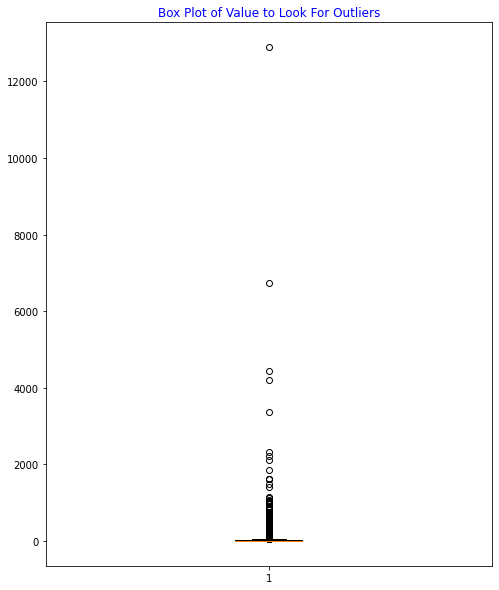

In [21]:
#we observe that the records in the values column have an outlier
#the maximum value is 12900. # this is illogical
#we treat the value as an outlier.
#outliers are droped
plt.figure(figsize=(8,10))
plt.title('Box Plot of Value to Look For Outliers',color='blue')
plt.boxplot(telcom['VALUE'])
plt.show()

In [22]:
#from the boxplot we can observe that there are other 7 outlier values
#most of the data lies between 0 and 2400
#we willd drop rows with this outlier values
#threshold=2400
print(np.where(telcom['VALUE']>2400))
todrop=telcom[(telcom['VALUE']==1128) & (telcom['VALUE']==6072) & (telcom['VALUE']==10460) & (telcom['VALUE']==11552) & (telcom['VALUE']==11838)].index
telcom.drop(todrop , inplace=True)

(array([ 1228,  6072, 10460, 11552, 11838]),)


To merge the two tables so as to have one dataset that we will use our analysis on

In [23]:
# to merge the two tables
# table cells and telecom

In [24]:
merged_telecom=cells.merge(telcom,how='inner',left_on=['SITE_CODE'],right_on=['SITE_ID'])

In [25]:
merged_telecom.tail(10)

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,REGION,AREA,CELL_ID_x,SITE_CODE,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID_y,SITE_ID
51187,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,0,00:39.0,1,2affb48ed0f7e90,55ad144fa74fddc,19e2e,19e2e,c92be6915d,61bee9c70c
51188,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,0,00:57.0,1,f7a5460e1aa90f9,f36373758b3fb9b,19e2e,19e2e,c92be6915d,61bee9c70c
51189,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,0,01:37.0,1,f7a5460e1aa90f9,f36373758b3fb9b,19e2e,19e2e,c92be6915d,61bee9c70c
51190,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,3,00:18.0,1,799cfb18cce4f9b,6f54dd640e46886,19e2e,19e2e,c92be6915d,61bee9c70c
51191,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,21,01:13.0,1,4d65c9c935d0201,f4a80e2a51cc197,19e2e,19e2e,c92be6915d,61bee9c70c
51192,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,90,01:21.0,1,16b18134457df0c,741ce69ff5ae71f,19e2e,19e2e,c92be6915d,61bee9c70c
51193,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,0,00:12.0,1,799cfb18cce4f9b,28af748b735567c,19e2e,19e2e,c92be6915d,61bee9c70c
51194,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,sms,0,00:24.0,1,e4c44576789349d,65eca43003c502a,19e2e,19e2e,c92be6915d,61bee9c70c
51195,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,Voice,34,01:00.0,1,80b550ee361afad,21f9e5a5e35d2f0,19e2e,19e2e,c92be6915d,61bee9c70c
51196,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c,sms,0,01:37.0,1,05fb44a35341a8f,cbc45d65009f36c,19e2e,19e2e,c92be6915d,61bee9c70c


In [26]:
#to drop duplicates
merged_telecom.drop_duplicates(inplace=True)
merged_telecom.shape

(49451, 19)

In [27]:
merged_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49451 entries, 0 to 51196
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VILLES           49451 non-null  object
 1   STATUS           49451 non-null  object
 2   LOCALISATION     49451 non-null  object
 3   DECOUPZONE       49451 non-null  object
 4   ZONENAME         49451 non-null  object
 5   REGION           49451 non-null  object
 6   AREA             49451 non-null  object
 7   CELL_ID_x        49451 non-null  object
 8   SITE_CODE        49451 non-null  object
 9   PRODUCT          49451 non-null  object
 10  VALUE            49451 non-null  int64 
 11  DATE_TIME        49451 non-null  object
 12  CELL_ON_SITE     49451 non-null  object
 13  DW_A_NUMBER_INT  49451 non-null  object
 14  DW_B_NUMBER_INT  49451 non-null  object
 15  COUNTRY_A        49451 non-null  object
 16  COUNTRY_B        49451 non-null  object
 17  CELL_ID_y        49451 non-null

In [28]:
merged_null=merged_telecom.isna().sum()
merged_null=merged_null[merged_null!=0]
print('number of columns with missing values are',len(merged_null))
merged_null.sort_values(ascending=False)

number of columns with missing values are 0


Series([], dtype: int64)

In [29]:
#to get a look at the attributes of the table
print('shape of the combined dataset: ',merged_telecom.shape)
print('size of the combined dataset: ',merged_telecom.size)
print('dimensions of the merged dataset: ',merged_telecom.ndim)

shape of the combined dataset:  (49451, 19)
size of the combined dataset:  939569
dimensions of the merged dataset:  2


In [30]:
#to drop columns that will not be needed in this analysis
merged_telecom.drop(['LOCALISATION','DECOUPZONE','REGION','SITE_CODE','CELL_ON_SITE','DW_A_NUMBER_INT','DW_B_NUMBER_INT','COUNTRY_B','COUNTRY_A'],axis=1,inplace=True)

In [31]:
#to check if the columns have been dropped
merged_telecom.columns

Index(['VILLES', 'STATUS', 'ZONENAME', 'AREA', 'CELL_ID_x', 'PRODUCT', 'VALUE',
       'DATE_TIME', 'CELL_ID_y', 'SITE_ID'],
      dtype='object')

In [32]:
merged_telecom.dtypes

VILLES       object
STATUS       object
ZONENAME     object
AREA         object
CELL_ID_x    object
PRODUCT      object
VALUE         int64
DATE_TIME    object
CELL_ID_y    object
SITE_ID      object
dtype: object

**ANALYSIS**

where most users from

In [33]:
#to get the city with the most users
merged_telecom['VILLES'].value_counts()

YOPOUGON    8417
ABOBO       6147
COCODY      3704
ADJAME      2505
KOUMASSI    2275
            ... 
PAKAOUBO       3
ZAROKO         3
KONGASSO       3
KOTOULA        2
DANANON        2
Name: VILLES, Length: 398, dtype: int64

In [34]:
#most calls were made by people in the ville Yopougon

Ville where most revenue was generated from

In [35]:
merged_telecom.groupby('VILLES')['VALUE'].agg('sum').sort_values(ascending=False)

VILLES
YOPOUGON           201875
COCODY             177745
ABOBO              124060
KOUMASSI            71356
TREICHVILLE         62949
                    ...  
TIEMELEKRO              0
BROFODOUME              0
NGATTADOLIKRO           0
DOUGROUPALEGNOA         0
WENDENE                 0
Name: VALUE, Length: 398, dtype: int64

In [36]:
# MTN generated most revenue from the ville Yopougon
#this is true since it had the most users

which was the most used product

In [37]:
print('number unique values in product: ',merged_telecom['PRODUCT'].nunique())
print('unique products:', merged_telecom['PRODUCT'].unique())
print('\n\n')
merged_telecom['PRODUCT'].value_counts()

number unique values in product:  2
unique products: ['Voice' 'sms']





sms      28515
Voice    20936
Name: PRODUCT, dtype: int64

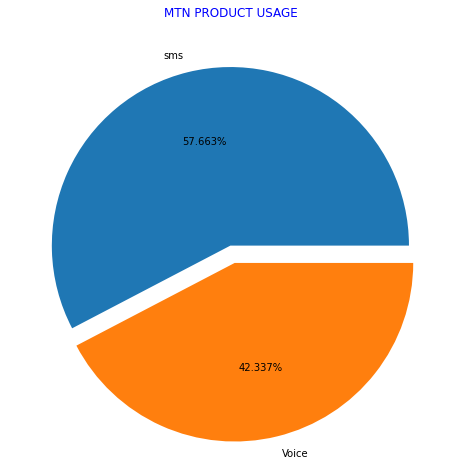

In [38]:
# create a plot to see this
plt.figure(figsize=(8,10))
plt.title('MTN PRODUCT USAGE',fontdict={'fontsize':12},color='blue')
explode=0,0.1
labels='sms','Voice'
plt.pie(merged_telecom['PRODUCT'].value_counts(),labels=labels,explode=explode,autopct='%1.3f%%')
plt.show()

In [39]:
# sms services were the most used

From which Villes were the most calls from

In [40]:
# to get the rows with only voice calls
#we put those rows in a column called rows_voice
rows_voice=merged_telecom[merged_telecom['PRODUCT'].map(lambda PRODUCT: 'Voice' in PRODUCT)]
rows_voice

,VILLES,STATUS,ZONENAME,AREA,CELL_ID_x,PRODUCT,VALUE,DATE_TIME,CELL_ID_y,SITE_ID
0,ADJAME,In Service,AGBANNEW,unknown,fbb2e75af3,Voice,34,00:58.0,ac8f1ccb39,0bb492ef17
1,ADJAME,In Service,AGBANNEW,unknown,1502501d78,Voice,34,00:58.0,ac8f1ccb39,0bb492ef17
2,ADJAME,In Service,AGBANNEW,unknown,0c2e182a0c,Voice,34,00:58.0,ac8f1ccb39,0bb492ef17
3,ABOBO,In Service,NPONON,unknown,a70c1d263b,Voice,189,00:18.0,35a513722e,56306cc7ca
4,ABOBO,In Service,NPONON,unknown,a70c1d263b,Voice,27,00:30.0,35a513722e,56306cc7ca
...,...,...,...,...,...,...,...,...,...,...
51190,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,3,00:18.0,c92be6915d,61bee9c70c
51191,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,21,01:13.0,c92be6915d,61bee9c70c
51192,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,90,01:21.0,c92be6915d,61bee9c70c
51193,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,0,00:12.0,c92be6915d,61bee9c70c


In [41]:
rows_voice.groupby('VILLES')['PRODUCT'].value_counts().sort_values(ascending=False)

VILLES        PRODUCT
YOPOUGON      Voice      2947
ABOBO         Voice      1934
COCODY        Voice      1635
ADJAME        Voice      1037
YAMOUSSOUKRO  Voice      1017
                         ... 
KOKOUMBO      Voice         3
KONGASSO      Voice         3
KOONAN        Voice         3
DANANON       Voice         2
KOTOULA       Voice         2
Name: PRODUCT, Length: 367, dtype: int64

In [42]:
# from above we can see that most voice calls were from the vile yopougon

From which Villes were the most sms from

In [43]:
# to get the rows with only voice calls
#we put those rows in a column called rows_voice
rows_sms=merged_telecom[merged_telecom['PRODUCT'].map(lambda PRODUCT: 'sms' in PRODUCT)]
rows_voice

,VILLES,STATUS,ZONENAME,AREA,CELL_ID_x,PRODUCT,VALUE,DATE_TIME,CELL_ID_y,SITE_ID
0,ADJAME,In Service,AGBANNEW,unknown,fbb2e75af3,Voice,34,00:58.0,ac8f1ccb39,0bb492ef17
1,ADJAME,In Service,AGBANNEW,unknown,1502501d78,Voice,34,00:58.0,ac8f1ccb39,0bb492ef17
2,ADJAME,In Service,AGBANNEW,unknown,0c2e182a0c,Voice,34,00:58.0,ac8f1ccb39,0bb492ef17
3,ABOBO,In Service,NPONON,unknown,a70c1d263b,Voice,189,00:18.0,35a513722e,56306cc7ca
4,ABOBO,In Service,NPONON,unknown,a70c1d263b,Voice,27,00:30.0,35a513722e,56306cc7ca
...,...,...,...,...,...,...,...,...,...,...
51190,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,3,00:18.0,c92be6915d,61bee9c70c
51191,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,21,01:13.0,c92be6915d,61bee9c70c
51192,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,90,01:21.0,c92be6915d,61bee9c70c
51193,ZUENOULA,In Service,ZONE A - Grand-NORD,CENTRE NORTH,f9f3e42589,Voice,0,00:12.0,c92be6915d,61bee9c70c


In [44]:
rows_voice.groupby('VILLES')['PRODUCT'].value_counts().sort_values(ascending=False)

VILLES        PRODUCT
YOPOUGON      Voice      2947
ABOBO         Voice      1934
COCODY        Voice      1635
ADJAME        Voice      1037
YAMOUSSOUKRO  Voice      1017
                         ... 
KOKOUMBO      Voice         3
KONGASSO      Voice         3
KOONAN        Voice         3
DANANON       Voice         2
KOTOULA       Voice         2
Name: PRODUCT, Length: 367, dtype: int64

In [45]:
#we can see that the ville Yopougnon had the most sms 

In [46]:
merged_telecom['CELL_ID_x'].value_counts()

1ce5a37ea9    101
0c77287c00    101
d6a6e27eeb    101
122a33b94a    101
9e8e5e6e80    101
             ... 
f5a0142c37      1
285faed13e      1
d2769fc3e4      1
bdbed0ba55      1
96e0deab61      1
Name: CELL_ID_x, Length: 3389, dtype: int64

In [47]:
#most calls were made by the owner of the cell id 122a33b94a,1ce5a37ea9,9e8e5e6e80,d6a6e27eeb

Which product brought the most revenue to MTN

In [48]:
product_revenue_mean=merged_telecom.groupby('PRODUCT')['VALUE'].mean()
product_revenue_mean

PRODUCT
Voice    55.246943
sms       7.988217
Name: VALUE, dtype: float64

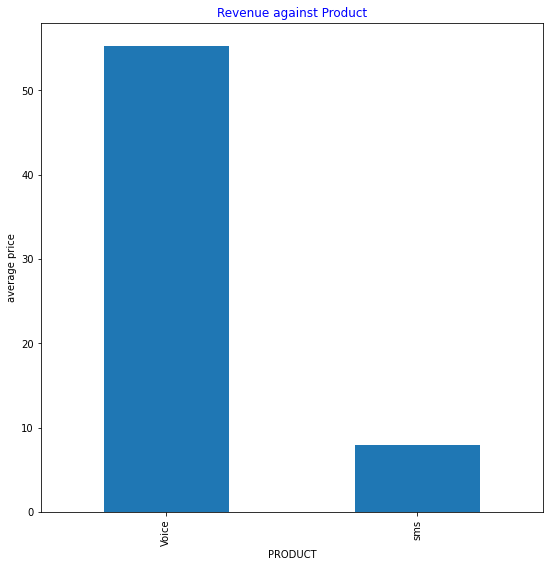

In [49]:
plt.figure(figsize=(9,9))
plt.title('Revenue against Product',fontdict={'fontsize':12},color='blue')
plt.xlabel('product')
plt.ylabel('average price')
product_revenue_mean.plot(kind='bar')
plt.show()

In [50]:
#voice products brought the most revenue for MTN
#revenue from voice product is eight times that of sms

which area had the most users

In [51]:
a=merged_telecom['AREA'].value_counts()
a

ABIDJAN NORTH    23710
ABIDJAN SOUTH     8386
CENTRE NORTH      5756
NORTH WEST        4959
SOUTH WEST        4887
EAST              1497
unknown            256
Name: AREA, dtype: int64

<function matplotlib.pyplot.show>

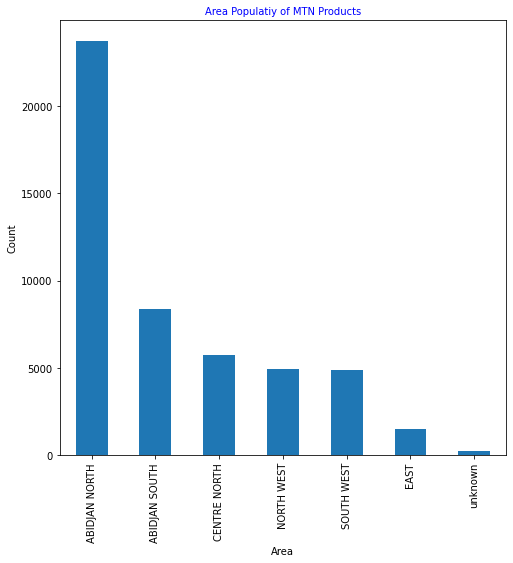

In [52]:
plt.figure(figsize=(8,8))
plt.title('Area Populatiy of MTN Products',fontdict={'fontsize':10},color='blue')
plt.xlabel('Area')
plt.ylabel('Count')
a.plot(kind='bar')
plt.show

In [53]:
# ABdijan North had the most user

In [54]:
# on average, voice products generated more revenue to MTN. revenue generated from calls is almost 8 times that generated from sms

which area generated most revenue

In [55]:
area_value=merged_telecom.groupby('AREA')['VALUE'].agg('sum')
area_value

AREA
ABIDJAN NORTH    612059
ABIDJAN SOUTH    268551
CENTRE NORTH     154062
EAST              63721
NORTH WEST       140321
SOUTH WEST       139723
unknown            5997
Name: VALUE, dtype: int64

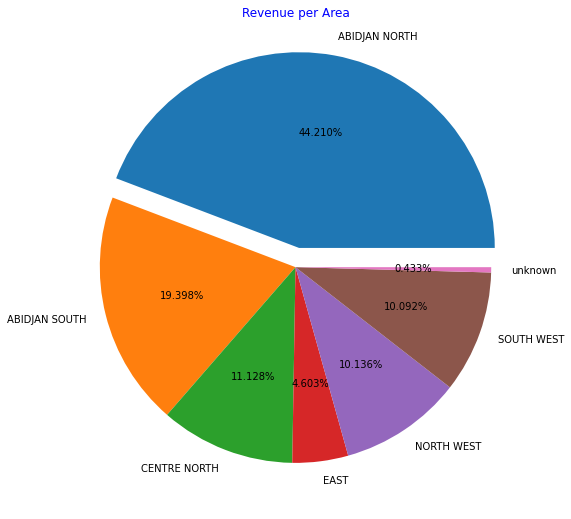

In [56]:
plt.figure(figsize=(9,9))
plt.title('Revenue per Area',fontdict={'fontsize':12},color='blue')
labels=['ABIDJAN NORTH','ABIDJAN SOUTH','CENTRE NORTH','EAST','NORTH WEST','SOUTH WEST','unknown']
explode=0.1,0,0,0,0,0,0
plt.pie(area_value,labels=labels,explode=explode,autopct='%1.3f%%')
plt.show()

In [57]:
#users from abdijan north generated the most revenue for MTN in the three days